# CIFAR - 10
## Basic CNN

In [3]:
%%bash
source ~/kerai/bin/activate

In [4]:
%matplotlib inline
import sys
import numpy as np
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten

from helper import get_class_names, get_train_data, get_test_data, plot_images

matplotlib.style.use('ggplot')

Using TensorFlow backend.


### Constants

In [5]:
class_names = get_class_names()
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
num_classes = len(class_names)
print(num_classes)

10


### Fetch and decode data

In [7]:
images_train, labels_train, class_train = get_train_data()

In [8]:
images_test, labels_test, class_test = get_test_data()

In [9]:
print("Training set size:\t",len(images_train))
print("Testing set size:\t",len(images_test))

Training set size:	 50000
Testing set size:	 10000


### One hot encoded labels

In [12]:
print(class_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]


### Normal labels

In [14]:
print(labels_train)

[6 9 9 ..., 9 1 1]


In [51]:
def cnn_model1():
    
    model = Sequential()
    
    model.add(Conv2D(48, (3, 3), activation = 'relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(48, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(96, (3, 3), activation = 'relu', padding='same'))
    model.add(Conv2D(96, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(192, (3, 3), activation = 'relu', padding='same'))
    model.add(Conv2D(192, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    
    return model
    

In [57]:
def cnn_model():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    
    return model
    

In [82]:
def train(model, X_train, y_train, X_val, y_val):
    
    """
    Train the model
    """
    
    
    #Save the model after every epoch
    checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',  # model filename
                                 monitor='val_loss', # quantity to monitor
                                 verbose=0, # verbosity - 0 or 1
                                 save_best_only= True, # The latest best model will not be overwritten
                                 mode='auto') # The decision to overwrite model is made 
                                              # automatically depending on the quantity to monitor 
        
        
    
    # Configure the model for training
    model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
                  optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
                  metrics = ['accuracy']) # Metrics to be evaluated by the model

    # Fits the model on the data provided

    model_details = model.fit(X_train, y_train,
                        batch_size = 128, # number of samples per gradient update
                        epochs = 15, # number of iterations
                        validation_data= (X_val, y_val),
                        callbacks=[checkpoint],
                        verbose=1)
    return model_details

For more information on categorical cross entropy loss function see - https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/

In [72]:
model = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_39 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
__________

In [73]:
model_details = train(model, images_train, class_train, images_test, class_test)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 77s - loss: 1.8784 - acc: 0.3244 - val_loss: 1.6760 - val_acc: 0.4249
Epoch 2/15
50000/50000 [==============================] - 76s - loss: 1.6025 - acc: 0.4285 - val_loss: 1.5273 - val_acc: 0.4722
Epoch 3/15
50000/50000 [==============================] - 76s - loss: 1.4754 - acc: 0.4707 - val_loss: 1.4170 - val_acc: 0.5175
Epoch 4/15
50000/50000 [==============================] - 76s - loss: 1.3894 - acc: 0.5047 - val_loss: 1.3382 - val_acc: 0.5445
Epoch 5/15
50000/50000 [==============================] - 76s - loss: 1.3202 - acc: 0.5307 - val_loss: 1.2832 - val_acc: 0.5569
Epoch 6/15
50000/50000 [==============================] - 76s - loss: 1.2683 - acc: 0.5529 - val_loss: 1.2331 - val_acc: 0.5815
Epoch 7/15
50000/50000 [==============================] - 76s - loss: 1.2224 - acc: 0.5712 - val_loss: 1.2050 - val_acc: 0.5802
Epoch 8/15
50000/50000 [==============================

### Model accuracy and loss

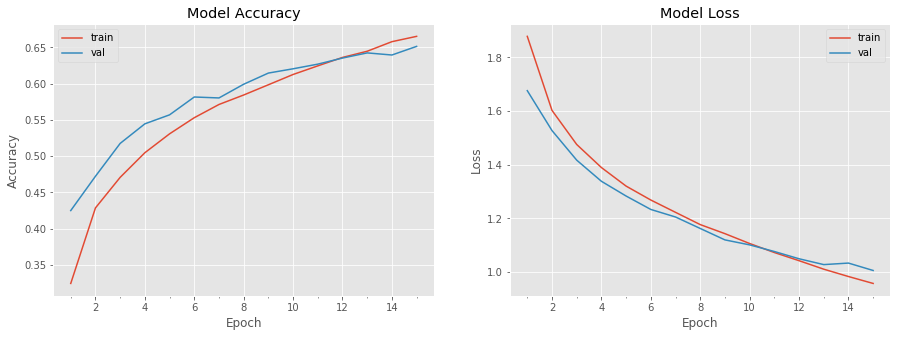

In [81]:
def plot_model(model_details):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    plt.show()
    
plot_model_history(model_details)

### Predictions

In [17]:
def plot_example_errors(cls_pred, correct):
    
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images_error = images_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = labels_test[incorrect]
    # Plot the first 9 images.
    plot_images(images=images_error[0:9],
                labels_true=cls_true[0:9],
                class_names=class_names,
                labels_pred=cls_pred[0:9])


def predict_cls(images, labels, cls_true):
    # Number of images.
    num_images = len(images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_images, dtype=np.int)

    best_model = load_model("model-015.h5")
    
    pred_labels = best_model.predict(images, batch_size=32)
    
    cls_pred = np.argmax(pred_labels,axis=1)
    
    cls_true = np.argmax(cls_true,axis=1)
    
    

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    
    return correct, cls_pred
def predict_cls_test():
    return predict_cls(images = images_test,
                       labels = labels_test,
                       cls_true = class_test)


Example errors:


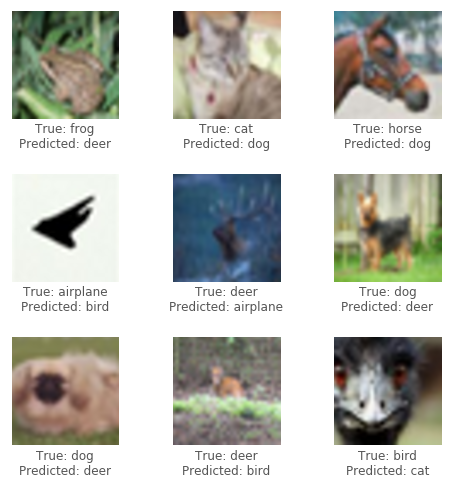

In [18]:
def print_test_accuracy(show_example_errors=False):

    # For all the images in the test-set,
    # calculate the predicted classes and whether they are correct.
    correct, cls_pred = predict_cls_test()
    
    
    
    # Number of images being classified.
    num_images = len(correct)

    

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)
        
print_test_accuracy(True)


## Credits

https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/06_CIFAR-10.ipynb
http://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/
https://parneetk.github.io/blog/cnn-cifar10/
https://github.com/dnlcrl/deep-residual-networks-pyfunt/blob/master/docs/CIFAR-10%20Experiments.ipynb